# Exercise 5.18

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
from IPython.display import display, Math
from scipy import stats

In [2]:
def load_data() -> pd.DataFrame:
    # Load the college test data from example 5.2.
    fpath = pathlib.Path(r'..\..\data\Table5.2.xlsx')
    return pd.read_excel(fpath)

In [3]:
test_df = load_data()

In [4]:
X = test_df.iloc[:, 1:].to_numpy()
n, p = X.shape

## (a)

In [5]:
mu0 = np.array([[500], [50], [30]])

In [6]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X, rowvar=False)

In [7]:
T2 = (n*(xbar - mu0).T @ la.inv(S) @ (xbar - mu0)).item()
T2

223.31017568489168

In [8]:
crit_f = ((n-1)*p)/(n-p)*stats.f.ppf(q=1-0.05, dfn=p, dfd=n-p)
crit_f

8.3334833261061

In [9]:
T2 > crit_f

True

$$
    H_{0}: \bm{\mu} = \begin{bmatrix}500 \\ 50 \\ 30 \end{bmatrix}
    \hspace{0.2cm}
    \text{versus}
    \hspace{0.2cm}
    H_{a}: \bm{\mu} \ne \begin{bmatrix}500 \\ 50 \\ 30 \end{bmatrix}
$$
Since $T^{2} = 223.31 > \frac{(n-1)p}{n - p} F_{p, n-p} (\alpha) = 8.33$, we would reject the null hypothesis, $H_{0}$, so at least one of the hypothesized mean components isn't consistent with the sample data.

## (b)

In [10]:
lmbda, ev = la.eigh(S)

In [11]:
ev = ev[:,np.argsort(lmbda[::-1])].copy()
lmbda[::-1].sort()

In [12]:
for i, l in enumerate(lmbda):
    display(Math(fr'\text{{The half lengths are }}\sqrt{{\lambda_{{{i+1}}}}}\sqrt{{\frac{{(n-1)p}}{{n-p}}F_{{p, n-p}}(\alpha)}} = ({np.sqrt(l):.2f})({np.sqrt(crit_f):.2f}) = {np.sqrt(l)*np.sqrt(crit_f):.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
display('The above lengths are in the direction of...')
for i in range(len(lmbda)):
    display(Math(fr'\lambda_{{{i+1}}}: [{ev[0, i]:.4f}, {ev[1, i]:.4f}, {ev[2, i]:.4f}]'))

'The above lengths are in the direction of...'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
ev

array([[ 0.99390539,  0.10373153, -0.0373074 ],
       [ 0.10344339, -0.99458923, -0.00957782],
       [ 0.03809906, -0.00566024,  0.99925794]])

## (c)

In [15]:
def my_q_q_plot(x: np.ndarray):
    x = x.copy()
    assert len(x.shape) == 1, "Wrong shape."
    x.sort()
    prob = (np.arange(x.size)+1 - 0.5) / n
    quant = stats.norm.ppf(prob)

    return plt.scatter(quant, x, facecolors='none', edgecolors='royalblue')

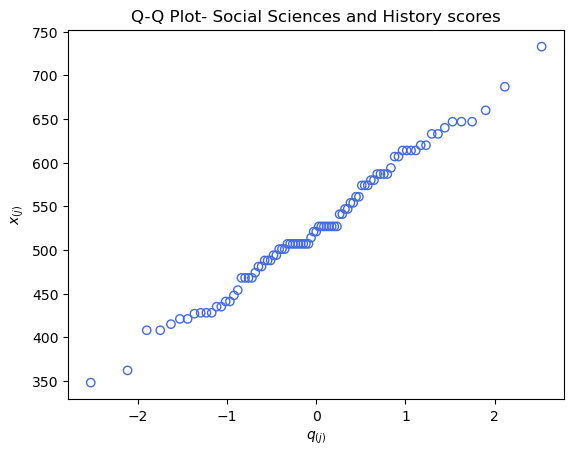

In [16]:
my_q_q_plot(X[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Social Sciences and History scores')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-18-c-QQ-SocSciHist.png')
plt.show()

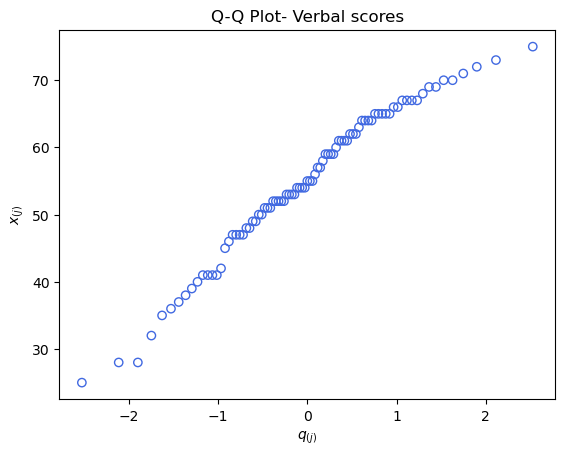

In [17]:
my_q_q_plot(X[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Verbal scores')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-18-c-QQ-Verbal.png')
plt.show()

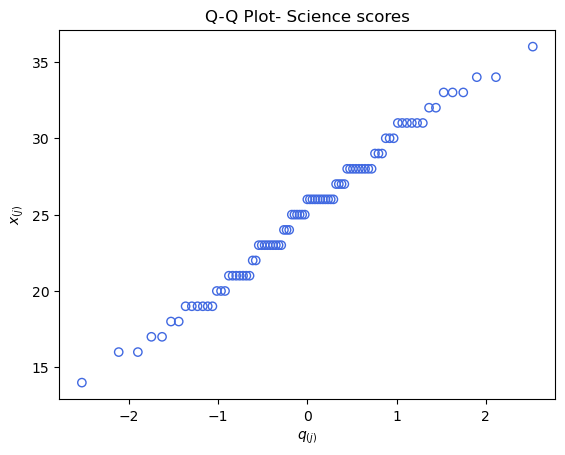

In [18]:
my_q_q_plot(X[:,2])
ax = plt.gca()
plt.title('Q-Q Plot- Science scores')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-18-c-QQ-Science.png')
plt.show()

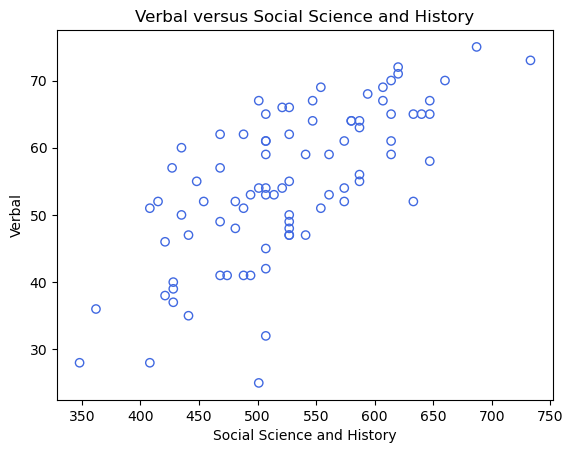

In [19]:
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='royalblue')
plt.title('Verbal versus Social Science and History')
plt.xlabel('Social Science and History')
plt.ylabel('Verbal')
plt.savefig('Question-5-18-c-xy-SocSciHist-Verbal.png')
plt.show()

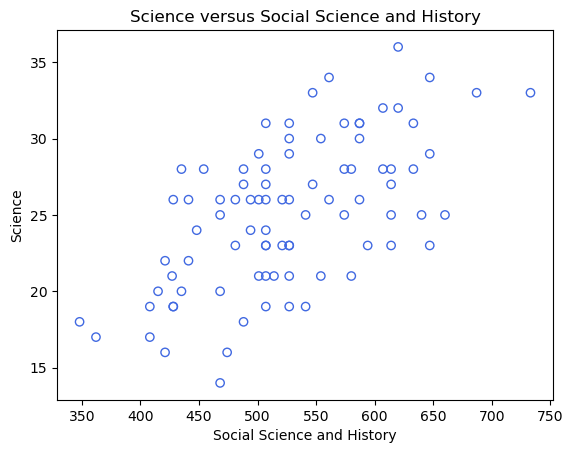

In [20]:
plt.scatter(X[:,0], X[:,2], facecolors='none', edgecolors='royalblue')
plt.title('Science versus Social Science and History')
plt.xlabel('Social Science and History')
plt.ylabel('Science')
plt.savefig('Question-5-18-c-xy-SocSciHist-Science.png')
plt.show()

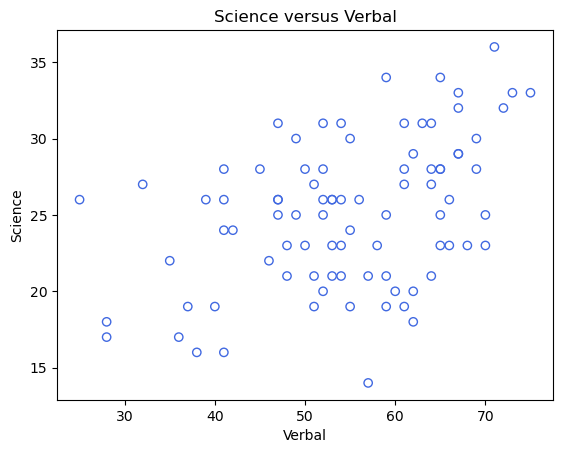

In [21]:
plt.scatter(X[:,1], X[:,2], facecolors='none', edgecolors='royalblue')
plt.title('Science versus Verbal')
plt.xlabel('Verbal')
plt.ylabel('Science')
plt.savefig('Question-5-18-c-xy-Verbal-Science.png')
plt.show()